# Binding and Unbinding Vectors

This notebook has as purpose to study the binding and unbinding of different vectors.

The vectors might be good to obtain them from Word2Vec or some other methodology

In [470]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
%matplotlib inline

In [532]:
#Circular Convolution Definition
#adapted from here https://github.com/fchollet/keras/issues/2518
# and https://stackoverflow.com/questions/35474078/python-1d-array-circular-convolution
#copied from:
#https://stackoverflow.com/questions/17473917/is-there-a-equivalent-of-scipy-signal-deconvolve-for-2d-arrays

def holographic_merge(x,y):
    x_fft = fft.fftshift(fft.fftn(x))
    y_fft = fft.fftshift(fft.fftn(y))
    return fft.fftshift(fft.ifftn(fft.ifftshift(x_fft*y_fft)))

def holographic_unmerge(z, y):
    z_fft = fft.fftshift(fft.fftn(z))
    y_fft = fft.fftshift(fft.fftn(y))
    return np.around(fft.fftshift(fft.ifftn(fft.ifftshift(z_fft/y_fft))),14)

#Lessons Learned:
# - Convolution and Deconvolution precision depend on each other 9deconv will have less)
# - I was missing the fftshift part also .... I NEED TO REVIEW MORE MATH!

In [446]:
Ar, Ai = np.concatenate([np.random.random(2), np.zeros(3), 
                         np.random.random(1), np.zeros(4)]), np.zeros(10)
Br, Bi = np.concatenate([np.zeros(2), np.random.random(3),
                        np.zeros(1), np.random.random(2), np.zeros(2)]), np.zeros(10)

In [496]:
x = np.vectorize(complex)(Ar,Ai)
y = np.vectorize(complex)(Br,Bi)

In [497]:
Ar,Br

(array([ 0.48210687,  0.10777446,  0.        ,  0.        ,  0.        ,
         0.75439675,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([ 0.        ,  0.        ,  0.52064111,  0.60376688,  0.0274651 ,
         0.        ,  0.79939001,  0.48002731,  0.        ,  0.        ]))

In [533]:
z =  holographic_merge(x,y)

In [534]:
z

array([  2.96003607e-03 -2.53905201e-16j,
         3.85391417e-01 +7.65506891e-18j,
         7.10348250e-01 +2.79022432e-16j,
         5.07214453e-01 -6.46380280e-17j,
         2.07195810e-02 -1.88107662e-16j,
         4.44089210e-17 -1.81392714e-17j,
         6.03057228e-01 +1.84672725e-16j,
         6.13135697e-01 +2.45237591e-17j,
         3.47191972e-01 +8.28918502e-17j,   7.83117600e-02 -5.39756732e-17j])

In [535]:
xp = holographic_unmerge(z,y)

In [536]:
x.real

array([ 0.48210687,  0.10777446,  0.        ,  0.        ,  0.        ,
        0.75439675,  0.        ,  0.        ,  0.        ,  0.        ])

In [537]:
xp.real

array([ 0.48210687,  0.10777446, -0.        ,  0.        , -0.        ,
        0.75439675, -0.        , -0.        ,  0.        , -0.        ])

## WTF 
After fighting with too many issues wiht the previous implementations I've found that
with Scipy there is somebody that managed to do it correctly
https://stackoverflow.com/questions/17473917/is-there-a-equivalent-of-scipy-signal-deconvolve-for-2d-arrays

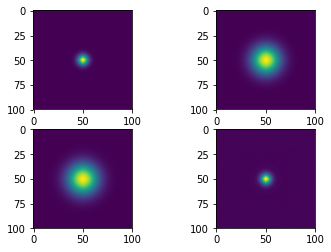

In [477]:
#copied from:
#https://stackoverflow.com/questions/17473917/is-there-a-equivalent-of-scipy-signal-deconvolve-for-2d-arrays

from scipy import fftpack
from scipy import stats

sx, sy = 100, 100
X, Y = np.ogrid[0:sx, 0:sy]
star = stats.norm.pdf(np.sqrt((X - sx/2)**2 + (Y - sy/2)**2), 0, 4)
psf = stats.norm.pdf(np.sqrt((X - sx/2)**2 + (Y - sy/2)**2), 0, 10)

def convolve(star, psf):
    star_fft = fftpack.fftshift(fftpack.fftn(star))
    psf_fft = fftpack.fftshift(fftpack.fftn(psf))
    return fftpack.fftshift(fftpack.ifftn(fftpack.ifftshift(star_fft*psf_fft)))

def deconvolve(star, psf):
    star_fft = fftpack.fftshift(fftpack.fftn(star))
    psf_fft = fftpack.fftshift(fftpack.fftn(psf))
    return fftpack.fftshift(fftpack.ifftn(fftpack.ifftshift(star_fft/psf_fft)))

star_conv = convolve(star, psf)
star_deconv = deconvolve(star_conv, psf)

f, axes = plt.subplots(2,2)
axes[0,0].imshow(star)
axes[0,1].imshow(psf)
axes[1,0].imshow(np.real(star_conv))
axes[1,1].imshow(np.real(star_deconv))
plt.show()

In [474]:
z = convolve(x,y)

In [475]:
xp = deconvolve(z,y)

In [481]:
np.around([xp.real, x.real], 15)

array([[ 0.48210687,  0.10777446,  0.        , -0.        ,  0.        ,
         0.75439675,  0.        , -0.        , -0.        ,  0.        ],
       [ 0.48210687,  0.10777446,  0.        ,  0.        ,  0.        ,
         0.75439675,  0.        ,  0.        ,  0.        ,  0.        ]])

In [486]:
yp = deconvolve(z,x)

In [487]:
np.around([y.real,yp.real], 15)

array([[ 0.        ,  0.        ,  0.52064111,  0.60376688,  0.0274651 ,
         0.        ,  0.79939001,  0.48002731,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.52064111,  0.60376688,  0.0274651 ,
         0.        ,  0.79939001,  0.48002731, -0.        ,  0.        ]])

In [549]:
arr = np.array([i for i in range(10)])
err = np.random.rand(10)

In [550]:
arr,err

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0.69460719,  0.43128322,  0.83682332,  0.54839164,  0.28529032,
         0.42427189,  0.73237276,  0.31930742,  0.49517406,  0.46726342]))

In [551]:
fftpack.fftshift(arr)

array([5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [541]:
fftpack.ifftshift(arr)

array([5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [552]:
fftpack.fftshift(err)

array([ 0.42427189,  0.73237276,  0.31930742,  0.49517406,  0.46726342,
        0.69460719,  0.43128322,  0.83682332,  0.54839164,  0.28529032])

In [553]:
fftpack.ifftshift(err)

array([ 0.42427189,  0.73237276,  0.31930742,  0.49517406,  0.46726342,
        0.69460719,  0.43128322,  0.83682332,  0.54839164,  0.28529032])

In [554]:
#well from this NON TRUSTED tests, seems that is only a rotation in the one dimensional case

In [558]:
(2-3j) * (2-3j)

(-5-12j)